In [1]:
#importing all the necessary libraries and modules
import numpy as np
import nltk
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [2]:
#Reading the provided pickle file
web_graph = nx.read_gpickle('web_graph.gpickle')

In [3]:
def get_query():
    """
    ### Description:
    Takes the query from the input
    
    ### Args:
    None
    
    ### Returns:
    returns the entered query
    """
    print("Enter your Query : ", end="")
    query = str(input())

    return query


def query_processing(query):
    """
    ### Description:
    This method lowers the case of query and returns the query tokens in the form of a list
    
    ### Args:
    `query`: The query which was entered by the user 
    
    ### Returns:
    return a list of tokenized words of query
    """
    query_tokens = word_tokenize(query.lower())

    return query_tokens


def get_root_set_AND(query_tokens, graph):
    """
    ### Description:
    This method is used to find the root set using AND Logic
    
    ### Args:
    `query_tokens` : list of tokenized words of query.
    `graph` : The graph from which root set is to be found.
    
    ### Returns:
    returns the root set
    """
    root_set = set()

    ##Finding the root nodes (Using AND logic)
    for i in graph.nodes:
        temp_page_content = (graph.nodes[i]['page_content']).lower()
        page_content_tokens = word_tokenize(temp_page_content)
        flag = 1
        for query_token in query_tokens:
            if query_token not in page_content_tokens:
                flag = 0
                break
        if flag == 1:
            root_set.add(i)
        else:
            continue

    return root_set


def get_root_set_OR(query_tokens, graph):
    """
    ### Description:
    This method is used to find the root set using OR Logic
    
    ### Args:
    `query_tokens` : list of tokenized words of query.
    `graph` : The graph from which root set is to be found.
    
    ### Returns:
    returns the root set
    """
    root_set = set()

    ##Finding the root nodes (Using OR logic)
    for i in graph.nodes:
        temp_page_content = (graph.nodes[i]['page_content']).lower()
        page_content_tokens = word_tokenize(temp_page_content)
        for query_token in query_tokens:
            if query_token in page_content_tokens:
                root_set.add(i)

    return root_set


def get_potential_hubs(root_set, graph):
    """
    ### Description:
    This method is used to find the all the potential hubs given the root set
    
    ### Args:
    `root_set`: The root set whose potential hubs are to be found
    `graph` : The graph from which potential hubs are to be found
    
    ### Returns:
    returns a list having nodes which are potential hubs
    """
    potential_hubs = set()
    for node in root_set:
        potential_hubs.update(graph.predecessors(node))
        potential_hubs.update(graph.successors(node))

    return potential_hubs


def get_base_set(root_set, potential_hubs):
    """
    ### Description:
    This method is used to find base set given potential hubs and root set
    
    ### Args:
    `root_set`: The root set of a graph for a given query
    `potential_hubs` : The potential hubs of a graph for a given query
    
    ### Returns:
    returns the base set of the graph for a given query
    """
    base_set = root_set.copy()
    base_set.update(potential_hubs)

    return base_set


def make_sub_graph(base_set, graph):
    """
    ### Description:
    This method is used to get the sub graph of graph which only contains the nodes of base_set and corresponding edges  
    
    ### Args:
    `base_set` : The base set from which sub graph is to be made.
    `graph` : The graph from which sub graph is to be made.
    
    ### Returns:
    returns the required sub graph
    """
    sub_graph = graph.subgraph(list(base_set))

    return sub_graph


def print_graph_content(graph):
    """
    ### Description:
    prints the attributes and data of each node of th graph
    
    ### Args:
    `graph`:graph whose data is to be printed
    
    ### Returns:
    Doesn't returns anything
    """
    for i in graph.nodes:
        print("Node : ", i)
        print("pos : ", graph.nodes[i]['pos'])
        print("page_content : ", graph.nodes[i]['page_content'])
        print("\n\n")


def print_graph(graph):
    """
    ### Description:
    Draws the graph
    
    ### Args:
    `graph`:graph which is to be visualized
    
    ### Returns:
    Doesn't returns anything
    """
    pos = {i: graph.nodes[i]['pos'] for i in graph.nodes}
    nx.draw(graph, pos)


def print_adjacency_list(graph):
    """
    ### Description:
    prints the graph in the form of adjacency list
    
    ### Args:
    `graph`:the graph which needs to be printed in the adjacency list format
    
    ### Returns:
    Doesn't returns anything
    """
    for source_node in graph.nodes:
        print(source_node, ": ", end="")
        for destination_node in graph.neighbors(source_node):
            print(destination_node, end=" ")
        print("")


def driver_AND(query, graph):
    """
    ### Description:
    This is the driver method, It basically calls all the required method to make the root_set, base_set, and sub graph using AND Logic for tokenized query
    
    ### Args:
    `query` : The query entered by the user.
    `graph` : The graph from which query is to be searched and sub graph is to be made.
    
    ### Returns:
    returns root set, base set and sub graph
    """
    query_tokens = query_processing(query)

    root_set = get_root_set_AND(query_tokens, graph)
    potential_hubs = get_potential_hubs(root_set, graph)
    base_set = get_base_set(root_set, potential_hubs)

    sub_graph = make_sub_graph(base_set, graph)
    return root_set, base_set, sub_graph


def driver_OR(query, graph):
    """
    ### Description:
    This is the driver method, It basically calls all the required method to make the root_set, base_set, and sub graph using OR Logic for tokenized query
    
    ### Args:
    `query` : The query entered by the user.
    `graph` : The graph from which query is to be searched and sub graph is to be made.
    
    ### Returns:
    returns root set, base set and sub graph
    """
    query_tokens = query_processing(query)

    root_set = get_root_set_OR(query_tokens, graph)
    potential_hubs = get_potential_hubs(root_set, graph)
    base_set = get_base_set(root_set, potential_hubs)

    sub_graph = make_sub_graph(base_set, graph)
    return root_set, base_set, sub_graph


def show_score(node_value):
    """
    ### Description:
    Show the hub/authorityvalue of base nodes in descending order by value
    
    ### Args:
    `node_value`: Dictionary having base_nodes and their corresponding hub/authority score 
    
    ### Returns:
    Doesn't return anything
    """
    temp_dic = {
        k: v
        for k, v in sorted(node_value.items(), key=lambda item: -item[1])
    }
    for key, value in temp_dic.items():
        print(key, ' : ', value)


def print_node_content(nodes, graph):
    """
    ### Description:
    prints the content of nodes
    
    ### Args:
    `nodes`: list which contains the nodes whose content is to be printed
    `graph`: The graph which contains the node whose content is to be printed
    
    ### Returns:
    Doesn't returns anything
    """
    for i in nodes:
        print("Node : ", i)
        print("pos : ", graph.nodes[i]['pos'])
        print("page_content : ", graph.nodes[i]['page_content'])
        print("\n\n")
        
def show_error_plot(iterations,x):
    """
    ### Description:
    prints the content of nodes
    
    ### Args:
    `nodes`: list which contains the nodes whose content is to be printed
    `graph`: The graph which contains the node whose content is to be printed
    
    ### Returns:
    Doesn't returns anything
    """
    plt.plot(iterations, x)
    plt.xlabel('Iterations')
    plt.ylabel('Error Value')
    for i in iterations:
        print(i, " : ", x[i])

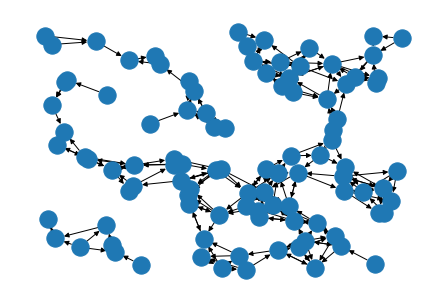

In [4]:
#Printing the web_graph
print_graph(web_graph)

In [5]:
#printintg the graph contents
print_graph_content(web_graph)

Node :  0
pos :  [0.558826241318043, 0.06144364920020873]
page_content :  Business: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.



Node :  1
pos :  [0.870441014719332, 0.793054832703095]
page_content :  Business: Retailers Vie for Back-To-School Buyers (Reuters) Reuters - Apparel retailers are hoping their\back-to-school fashions will make the grade among\style-conscious teens and young adults this fall, but it could\be a tough sell, with students and parents keeping a tighter\hold on their wallets.



Node :  2
pos :  [0.3313440615655663, 0.8831581367045994]
page_content :  Business: Dollar Briefly Hits 4-Wk Low Vs Euro  LONDON (Reuters) - The dollar dipped to a four-week low  against the euro on Monday before rising slightly on  profit-taking, but steep oil prices and weak U.S. data  continued to fan worries about the health of the world's  largest economy.



Node : 

In [6]:
def HITS_function(graph, iterations=1000):
    """
    ### Description:
    Hyperlink Induced Topic Search (HITS) Algorithm is a Link Analysis Algorithm that rates webpages. This algorithm is used to the web link-structures to discover and rank the webpages relevant for a particular search. HITS uses hubs and authorities to define a recursive relationship between webpages. This function calculates the hubs and authority score for each node in the graph. The Time complexity of HITS Algorithm implemented by us is O(number of iterations * number of edges in the graph).
    
    ### Args:
    `graph` : The graph on which HITS algorithm is to be implemented
    `iterations` : The number of iteratons for which the algorithm should be implemented if the scores doesn't converge
    
    ### Returns: 
    `current_hub_score` : The hub score of all the nodes in base set after reaching convergence.
    `current_authority_score` : The authority score of all the nodes in base set after reaching convergence.
    `hub_error_history` : list of error value of hub score for all the iterations.
    `authority_error_history` : list of error value of authority score for all the iterations.
    
    """
    #The error limit at which values are assummed to have converged
    error_limit = 1.0e-10

    current_hub_score = dict.fromkeys(graph, 1.0)
    current_authority_score = dict.fromkeys(graph, 1.0)

    hub_error_history = []
    authority_error_history = []

    for k in range(iterations):
        old_hub = current_hub_score
        old_authority = current_authority_score
        current_hub_score = dict.fromkeys(old_hub.keys(), 0.0)
        current_authority_score = dict.fromkeys(old_authority.keys(), 0.0)

        #Matrix Multiplication for authority score
        for i in current_hub_score:
            for j in graph[i]:
                current_authority_score[j] += old_hub[i] * graph[i][j].get(
                    "weight", 1)

        #Matrix Multiplication for hub score
        for i in current_hub_score:
            for j in graph[i]:
                current_hub_score[i] += old_authority[j] * graph[i][j].get(
                    "weight", 1)

        # normalizing the current_hub_score vector
        normalizing_factor = 1.0 / sum(current_hub_score.values())
        for i in current_hub_score:
            current_hub_score[i] *= normalizing_factor

        # normalizing the current_authority_score vector
        normalizing_factor = 1.0 / sum(current_authority_score.values())
        for i in current_authority_score:
            current_authority_score[i] *= normalizing_factor

        #Finding and storing the hub and authority error score
        hub_error = sum(
            abs(current_hub_score[n] - old_hub[n]) for n in current_hub_score)
        authority_error = sum(
            abs(current_authority_score[n] - old_authority[n])
            for n in current_authority_score)
        
        hub_error_history.append(hub_error)
        authority_error_history.append(authority_error)
        
        #Condition for convergence
        if hub_error < error_limit and authority_error < error_limit:
            break

    return current_hub_score, current_authority_score, hub_error_history, authority_error_history

In [7]:
#Getting Query
query = get_query()

Enter your Query : apple


In [8]:
#Getting the root set, base set and subgraph for the particular query
root_set, base_set, sub_graph = driver_AND(query, web_graph)

In [9]:
#root_set, base_set, sub_graph = driver_OR(query, web_graph)

In [10]:
#Printing the nodes in root set
root_set

{35, 36}

In [11]:
#printing the contents of nodes in root sets
print_node_content(list(root_set), sub_graph)

Node :  35
pos :  [0.12718986272242216, 0.09599238169931157]
page_content :  Sci/Tech: Apple Launches Graphics Software, Video Bundle  LOS ANGELES (Reuters) - Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday began shipping a new program designed to let users  create real-time motion graphics and unveiled a discount  video-editing software bundle featuring its flagship Final Cut  Pro software.



Node :  36
pos :  [0.9369369718054578, 0.23457797597956465]
page_content :  Sci/Tech: Dutch Retailer Beats Apple to Local Download Market  AMSTERDAM (Reuters) - Free Record Shop, a Dutch music  retail chain, beat Apple Computer Inc. to market on Tuesday  with the launch of a new download service in Europe's latest  battleground for digital song services.





In [12]:
#printing the nodes in base set
base_set

{6, 14, 29, 35, 36, 42, 44, 81, 93}

In [13]:
#Printing the number of nodes in sub graph
sub_graph.order()

9

In [14]:
#Printing the number of edges in sub graph
sub_graph.size()

13

In [15]:
#Adjecency list format for the sub graph
print_adjacency_list(sub_graph)

35 : 42 44 81 
36 : 93 
6 : 14 29 36 
42 : 
44 : 42 
14 : 29 36 93 
81 : 
93 : 29 
29 : 36 


In [16]:
#print_adjacency_list(web_graph)

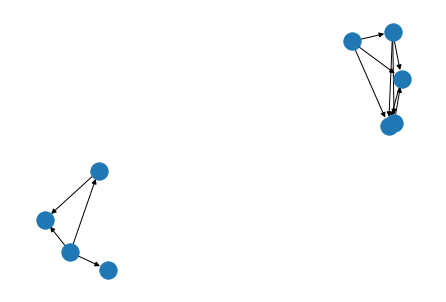

In [17]:
# Visual Representation of the sub graph
print_graph(sub_graph)

In [18]:
# Calling the HITS_Function
h, a, hub_error_history, authority_error_history = HITS_function(
    sub_graph, 100)

In [19]:
#Showing Hub Score in descending order by value
show_score(h)

14  :  0.33799278964234736
6  :  0.3240144206739409
93  :  0.13462857585385432
29  :  0.13462857585385432
36  :  0.0687356379346387
35  :  2.92490721431494e-11
44  :  1.2115362368521571e-11
42  :  0.0
81  :  0.0


In [20]:
#Showing Authority Score in descending order by value
show_score(a)

36  :  0.34278435583280686
29  :  0.34278435583280686
93  :  0.1750111462053887
14  :  0.13942014205163467
42  :  3.204475950555636e-11
44  :  2.265906674787098e-11
81  :  2.265906674787098e-11
35  :  0.0
6  :  0.0


In [21]:
iterations = [i for i in range(len(hub_error_history))]

0  :  8.0
1  :  0.2175066312997348
2  :  0.051466803911477024
3  :  0.15984593163216193
4  :  0.013439370923063139
5  :  0.10870254431332362
6  :  0.0058750125503808405
7  :  0.06894700263694675
8  :  0.003466082778867216
9  :  0.04205848058454669
10  :  0.0020838436293911314
11  :  0.025073037455233822
12  :  0.001231082788275854
13  :  0.01474538830351164
14  :  0.0007201801295541842
15  :  0.008602758001163991
16  :  0.000418888478805921
17  :  0.004995689331981383
18  :  0.00024282477171201741
19  :  0.0028931925222485566
20  :  0.00014048657210416092
21  :  0.001672930984106377
22  :  8.118608396186488e-05
23  :  0.0009664618387942056
24  :  4.688584519323954e-05
25  :  0.0005580379564157106
26  :  2.7066756406967553e-05
27  :  0.0003221152648558443
28  :  1.562194050781434e-05
29  :  0.0001859015387230518
30  :  9.01526497542367e-06
31  :  0.00010727804830300888
32  :  5.202236893318616e-06
33  :  6.190325243564936e-05
34  :  3.0018110469000558e-06
35  :  3.571918051625391e-05
36

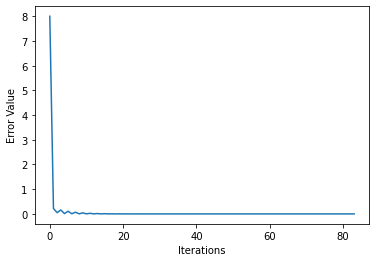

In [22]:
#Visualizing Hub Error PLot
show_error_plot(iterations,hub_error_history)

0  :  8.0
1  :  0.1191066997518611
2  :  0.22725084256138664
3  :  0.023576385587983625
4  :  0.16719304126894516
5  :  0.010672870601301954
6  :  0.112428435606027
7  :  0.005839110651379084
8  :  0.07132003050945865
9  :  0.0035935213007682737
10  :  0.04356815825592391
11  :  0.0021597867604415035
12  :  0.026001741427399784
13  :  0.0012770677128738812
14  :  0.015302275886831218
15  :  0.0007475367972520726
16  :  0.008931406319609966
17  :  0.00043495148776475983
18  :  0.005187816048034182
19  :  0.0002521851550508611
20  :  0.0030048911051950076
21  :  0.00014591791852921446
22  :  0.0017376628186739765
23  :  8.4330031206159e-05
24  :  0.0010039060248072226
25  :  4.870323204561865e-05
26  :  0.000579674432054362
27  :  2.8116488216217684e-05
28  :  0.0003346098125640257
29  :  1.6227997180986905e-05
30  :  0.0001931142709289065
31  :  9.365077367177554e-06
32  :  0.00011144088877668749
33  :  5.404116312638219e-06
34  :  6.430555770137368e-05
35  :  3.1183071403592643e-06
36 

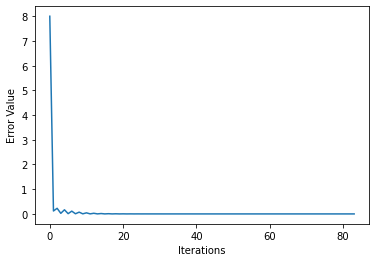

In [23]:
#Visualizing Authority Error Plot
show_error_plot(iterations,authority_error_history)